# Time Series Decomposition & Analysis Assignment

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import statsmodels.api as sm
import plotly_express as px

<IPython.core.display.Javascript object>

### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [40]:
sun_df = pd.read_csv("../data/monthly-sunspots.csv")
sun_df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


<IPython.core.display.Javascript object>

In [41]:
sun_df["Month"] = pd.to_datetime(sun_df["Month"])
sun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2820 non-null   datetime64[ns]
 1   Sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


<IPython.core.display.Javascript object>

### Use a line chart to plot the time series.

In [42]:
px.line(sun_df, "Month", "Sunspots")

<IPython.core.display.Javascript object>

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [59]:
series = sun_df.set_index("Month")
decomposition = sm.tsa.seasonal_decompose(series, model="additive", period=132)


trend = decomposition.trend
seasonality = decomposition.seasonal
resid = decomposition.resid

merged = sun_df.merge(trend, on="Month")
merged = merged.merge(seasonality, on="Month")
merged = merged.merge(resid, on="Month")
merged

,Month,Sunspots,trend,seasonal,resid
0,1749-01-01,58.0,NaN,21.159749,NaN
1,1749-02-01,62.6,NaN,22.168707,NaN
2,1749-03-01,70.0,NaN,24.953612,NaN
3,1749-04-01,55.7,NaN,27.488196,NaN
4,1749-05-01,85.0,NaN,31.781605,NaN
...,...,...,...,...,...
2815,1983-08-01,71.8,NaN,8.364862,NaN
2816,1983-09-01,50.3,NaN,8.181775,NaN
2817,1983-10-01,55.8,NaN,-2.858623,NaN
2818,1983-11-01,33.3,NaN,-5.205687,NaN


<IPython.core.display.Javascript object>

### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [60]:
melted = pd.melt(
    merged, id_vars="Month", value_vars=["Sunspots", "trend", "seasonal", "resid"]
)
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11280 entries, 0 to 11279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     11280 non-null  datetime64[ns]
 1   variable  11280 non-null  object        
 2   value     11016 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 264.5+ KB


<IPython.core.display.Javascript object>

In [61]:
melted.head()

,Month,variable,value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


<IPython.core.display.Javascript object>

In [62]:
px.line(melted, x="Month", y="value", color="variable")

<IPython.core.display.Javascript object>

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [71]:
sun_df["rolling_mean"] = sun_df["Sunspots"].rolling(window=132).mean()
sun_df["rolling_std"] = sun_df["Sunspots"].rolling(window=132).std()

rolling = pd.melt(
    sun_df, id_vars="Month", value_vars=["Sunspots", "rolling_mean", "rolling_std"]
)
rolling

,Month,variable,value
0,1749-01-01,Sunspots,58.000000
1,1749-02-01,Sunspots,62.600000
2,1749-03-01,Sunspots,70.000000
3,1749-04-01,Sunspots,55.700000
4,1749-05-01,Sunspots,85.000000
...,...,...,...
8455,1983-08-01,rolling_std,56.638913
8456,1983-09-01,rolling_std,56.677171
8457,1983-10-01,rolling_std,56.691432
8458,1983-11-01,rolling_std,56.736456


<IPython.core.display.Javascript object>

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [72]:
px.line(rolling, "Month", "value", color="variable")

<IPython.core.display.Javascript object>

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [74]:
adf_test = sm.tsa.stattools.adfuller(sun_df["Sunspots"])

results = pd.Series(
    adf_test[0:4],
    index=["ADF Test Statistic", "P-Value", "# Lags Used", "# Observations Used"],
)

for key, value in adf_test[4].items():
    results["Critical Value (%s)" % key] = value

print("Augmented Dickey-Fuller Test Results:\n")
print(results)

Augmented Dickey-Fuller Test Results:

ADF Test Statistic     -9.567668e+00
P-Value                 2.333452e-16
# Lags Used             2.700000e+01
# Observations Used     2.792000e+03
Critical Value (1%)    -3.432694e+00
Critical Value (5%)    -2.862576e+00
Critical Value (10%)   -2.567321e+00
dtype: float64


<IPython.core.display.Javascript object>

### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

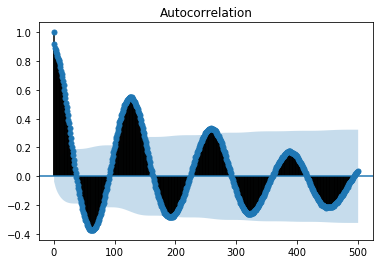

<IPython.core.display.Javascript object>

In [77]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(series, lags=500)